# Datos temporales con Xarray

![timeseries_example](assets/timeseries_example.jpg)

En este notebook vamos a ver como manejar y representar datos temporales en Python.  

Vamos a usar principalmente dos paquetes:
1. [`Pandas`](https://pandas.pydata.org/docs/index.html)
2. [`Xarray`](https://docs.xarray.dev/en/stable/index.html#).

En este tutorial veremos el caso de `Xarray` para datos temporales en 3 o más dimensiones.

Siguiendo el ejemplo de Charles, aquí podemos instalar pandas y xarray en caso de no tenerlas:

**Xarray**

pip install xarray

**Pandas**

pip install pandas

### Lo primero es cargar las liberías básicas y los datos que vamos a utilizar

In [1]:
import numpy as np # libreria que procesa matrices
import pandas as pd # libreria alternativa para procesar matrices
import xarray as xr # liberías par procesar matrices multidimensionales 
# La liberia más usada para graficar datos
import matplotlib.pyplot as plt # importamos el módulo pyplot 
from matplotlib.dates import date2num, num2date, datetime # este módulo para encargarnos de la variable temporal

Utilizaremos la misma base de datos SST que usamos en la introducción, sólo que ahora lo cargaremos con `Xarray`.

In [6]:
fileobj = xr.open_dataset('data/ERA5_Coarse.nc') # importando el archivo
sst = fileobj['sst'][:] # Leyendo las variables del archivo, como dijimos, un nombre auto-explicativo
sst = sst - 273.15 # convertiendo a Celsius de Kelvin
sst.dims

('time', 'latitude', 'longitude')

En este caso no es necesario definir lat, lon y time ya que podemos acceder fácilmente desde la estructura de nuestra variable 'sst'

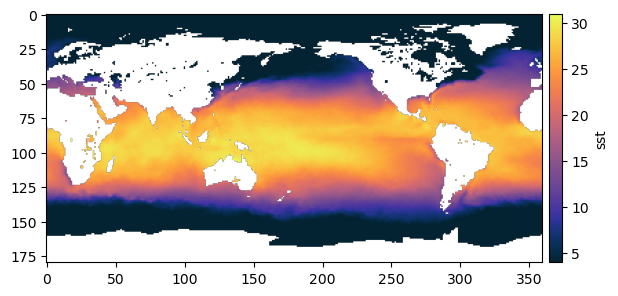

In [7]:
# Hacemos un pequeño plot espacial para ver nuestros datos
import cmocean as cmo
cmap = cmo.cm.thermal
fig, ax = plt.subplots()
image = plt.imshow(sst[0],cmap=cmap,
                  vmin=4,vmax=31)

cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,0.02,
                    ax.get_position().height])
cbar= plt.colorbar(image, cax=cax)
cbar.set_label('sst') 
plt.show()

#### Como vemos tenemos datos temporales en lat y lon, así que podemos realizar una media temporal

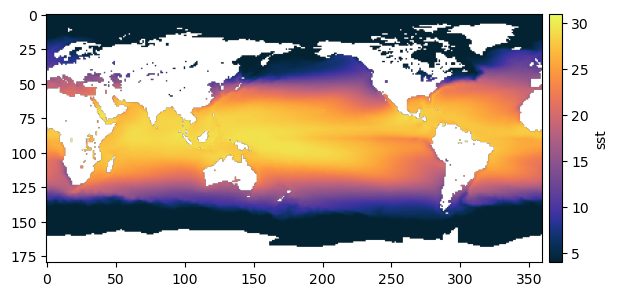

In [8]:
sst_mean = sst.mean(dim='time') # definimos la dimensión a la que se realiza la media
fig, ax = plt.subplots()
image = plt.imshow(sst_mean,cmap=cmap,
                  vmin=4,vmax=31)

cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,0.02,
                    ax.get_position().height])
cbar= plt.colorbar(image, cax=cax)
cbar.set_label('sst') 
plt.show()

### Seleccionar datos concretos  

In [9]:
# Seleccionar un año concreto
print(sst.sel(time='1965').squeeze().time.values)
# Seleccionar un periodo concreto
print(sst.sel(time=slice('1965','1995')).time.values)
# Seleccionar un mes concreto
print(sst.isel(time=(sst.time.dt.month == 1)).time.values)

1965-09-01T00:00:00.000000000
['1965-09-01T00:00:00.000000000' '1969-01-01T00:00:00.000000000'
 '1972-05-01T00:00:00.000000000' '1975-09-01T00:00:00.000000000'
 '1979-01-01T00:00:00.000000000' '1982-05-01T00:00:00.000000000'
 '1985-09-01T00:00:00.000000000' '1989-01-01T00:00:00.000000000'
 '1992-05-01T00:00:00.000000000' '1995-09-01T00:00:00.000000000']
['1959-01-01T00:00:00.000000000' '1969-01-01T00:00:00.000000000'
 '1979-01-01T00:00:00.000000000' '1989-01-01T00:00:00.000000000'
 '1999-01-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000']


### Agrupar   

In [10]:
sst.groupby("time.month") # Lo que significa es que tenemos datos de los meses 1, 5 y 9
#sst.groupby("time.year")

<DataArrayGroupBy, grouped over 1 grouper(s), 3 groups in total:
    'month': UniqueGrouper('month'), 3/3 groups with labels 1, 5, 9>

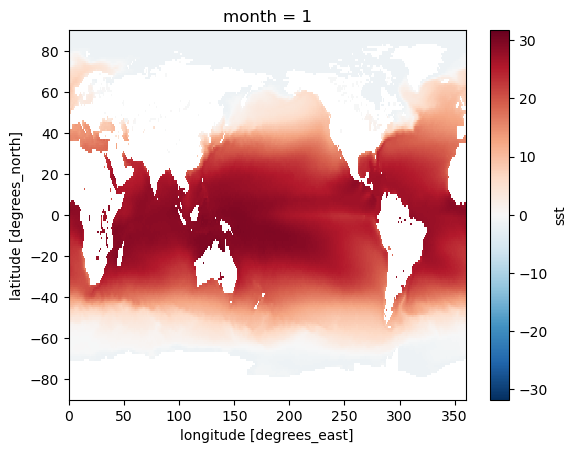

In [11]:
sst.groupby("time.month").mean().sel(month=1).plot() # Así graficamos los datos del mes

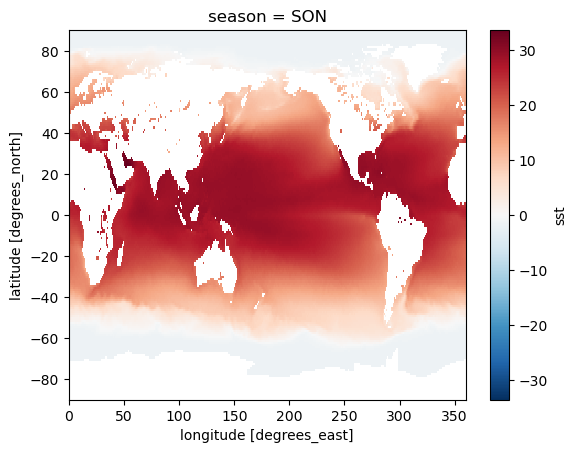

In [12]:
# También podemos agrupar por décadas y graficar
sst.groupby("time.season").mean().isel(season=2).plot() # Así graficamos los datos del mes

#### También se puede usar la función resample

In [13]:
sst.resample(time='1YE').mean() # 'S' usa el inicio del año, y 'E' el final

<xarray.DataArray 'sst' (time: 61, latitude: 180, longitude: 360)> Size: 32MB
array([[[-1.69034692, -1.69034692, -1.69034692, ..., -1.69034692,
         -1.69034692, -1.69034692],
        [-1.69034692, -1.69034692, -1.69034692, ..., -1.69034692,
         -1.69034692, -1.69034692],
        [-1.69034692, -1.69034692, -1.69034692, ..., -1.69034692,
         -1.69034692, -1.69034692],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-1.68911296, -1.68911296, -1.68911296, ..., -1.68911296,
         -1.68911296, -1.68911296],
        [-1.68911296, -1.68911296, -1.68911296, ..., -1.68911296,
         -1.68911296, -1.68911296],
        [-1.68911296, -1.68911296, -1.68911296, ..., -1.68911296,
         -1.68911296, -1.68911296],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], shape=(61, 180, 360))
Coordinates:
  * latitude   (latitude) float32 720B 89.62 88.62 87.62 ... -88.38 -89.38
  * longitude  (longitude) float32 1kB 0.375 1.375 2.375 ... 357.4 358.4 359.4
  * time       (time) datetime64[ns] 488B 1959-12-31 1960-12-31 ... 2019-12-31

In [14]:
sst.resample(time='1MS').mean().time # ¿En qué se diferencia de groupby?

<xarray.DataArray 'time' (time: 721)> Size: 6kB
array(['1959-01-01T00:00:00.000000000', '1959-02-01T00:00:00.000000000',
       '1959-03-01T00:00:00.000000000', ..., '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000'],
      shape=(721,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 6kB 1959-01-01 1959-02-01 ... 2019-01-01
Attributes:
    long_name:  time

### Realiza y graficar media y media espacial ponderada

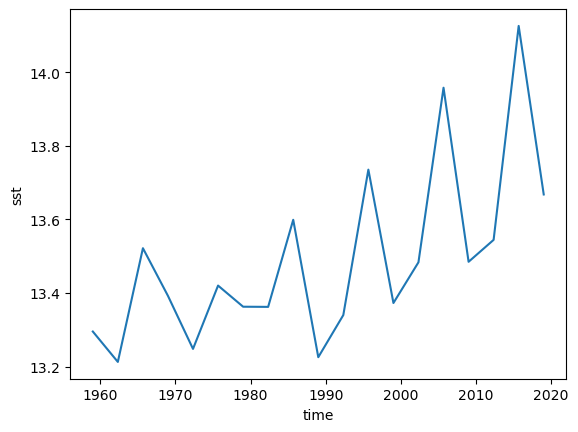

In [15]:
sst_media = sst.mean(dim=['latitude','longitude'])
sst_media.plot()

**La media ponderada tiene en cuenta el grid (el tamaño de cada pixel)**

In [18]:
import subprocess #esta libería permite usar CDO en Python
sst.to_netcdf('data/sst.nc')

In [20]:
subprocess.run(["cdo","gridarea",'data/sst.nc','data/sst_grid.nc'])
          

cdo    gridarea: Using default planet radius: 6371000m


CompletedProcess(args=['cdo', 'gridarea', 'data/sst.nc', 'data/sst_grid.nc'], returncode=0)

In [21]:
sst_area = xr.open_dataset("data/sst_grid.nc")
areacello = (sst_area.cell_area * sst[0].notnull())
w = areacello/areacello.sum()

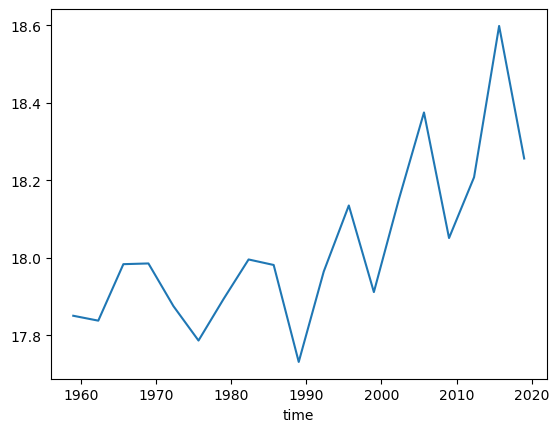

In [22]:
sst_media_pond = (sst * w).sum(dim=['latitude','longitude'])
sst_media_pond.plot()

**Suavizar la serie temporal**

In [23]:
xs = sst_media_pond.time.dt.year # vector of time in years
#Moving average
movavg_sst_media_pond = sst_media_pond.rolling(time=3,center=True).mean() #Elijo 3 ya que cada punto se diferencia unos 3 años
# Otros métodos que exigen interpolación: ejemplo de la Spline
import scipy.stats as sstat
from scipy.interpolate import UnivariateSpline
# Creating a spline regression model of current Tmax
spl_sst_media_pond = UnivariateSpline(xs, sst_media_pond.values,k=4)  # 4 Degrees of freedom

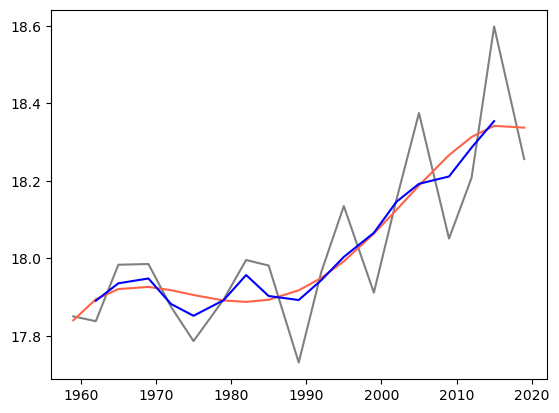

In [24]:
fig, ax = plt.subplots()
plt.plot(xs,sst_media_pond,'grey')
plt.plot(xs,spl_sst_media_pond(xs),'tomato')
plt.plot(xs,movavg_sst_media_pond,'blue')
plt.show()

<Axes: xlabel='year', ylabel='None'>

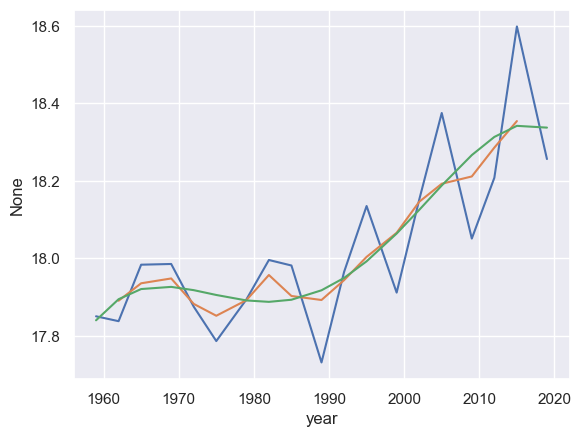

In [25]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(y=sst_media_pond,x=xs)
sns.lineplot(y=movavg_sst_media_pond,x=xs)
sns.lineplot(y=spl_sst_media_pond(xs),x=xs)

In [26]:
# Mucho mejor con Pandas
# --- Creamos una dataframe de Pandas
values = {'sst_media_pond': sst_media_pond,
          'movavg_sst_media_pond': movavg_sst_media_pond,
          'spl_sst_media_pond': spl_sst_media_pond(xs),
         }
df = pd.DataFrame(values,index=xs)
df.head()

,sst_media_pond,movavg_sst_media_pond,spl_sst_media_pond
1959,17.850480,NaN,17.840104
1962,17.837850,17.890632,17.894507
1965,17.983566,17.935609,17.920748
1969,17.985412,17.948083,17.926338
1972,17.875272,17.882414,17.917887


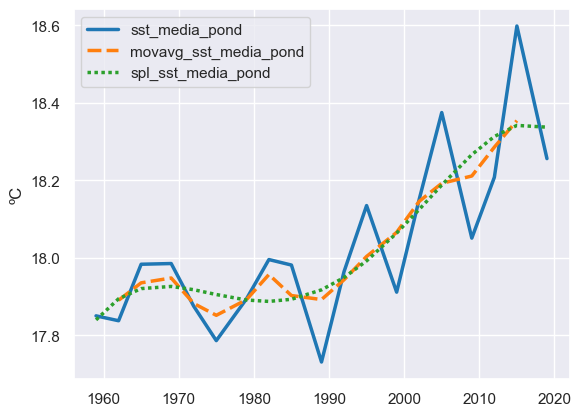

In [79]:
fig, ax = plt.subplots()
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, palette="tab10", linewidth=2.5,)
plt.ylabel('ºC')
plt.show()